<a href="https://colab.research.google.com/github/Sahilgupta100/pw_skills_assignment/blob/main/Logistic_regressiom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logreg = LogisticRegression(max_iter=10000)
rand_search = RandomizedSearchCV(logreg, param_distributions=param_dist, cv=5, scoring='accuracy', n_iter=10)
rand_search.fit(X_train, y_train)

print("Best parameters:", rand_search.best_params_)
print("Accuracy:", accuracy_score(y_test, rand_search.predict(X_test)))


Best parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}
Accuracy: 0.9707602339181286


. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy



In [7]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
ovo.fit(X_train, y_train)

print("Accuracy (OvO):", accuracy_score(y_test, ovo.predict(X_test)))


Accuracy (OvO): 1.0


3. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification

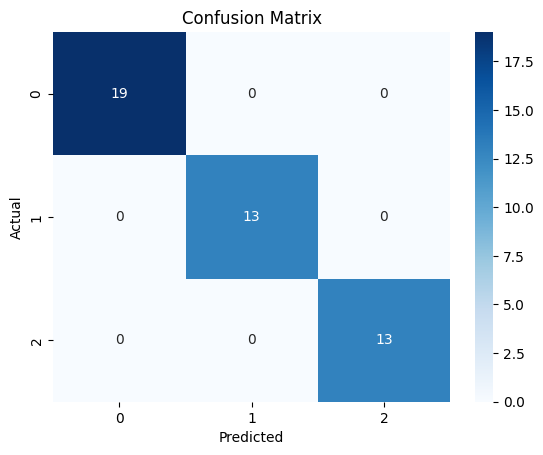

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


4. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

5. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance

In [10]:
model_weighted = LogisticRegression(class_weight='balanced', max_iter=1000)
model_weighted.fit(X_train, y_train)
print("Accuracy with class weights:", accuracy_score(y_test, model_weighted.predict(X_test)))


Accuracy with class weights: 1.0


6. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance

In [11]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

# Encode categorical
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Titanic dataset accuracy:", accuracy_score(y_test, model.predict(X_test)))


Titanic dataset accuracy: 0.7988826815642458


<ipython-input-11-94eac857e61c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = imputer.fit_transform(df[['Age']])
<ipython-input-11-94eac857e61c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = LabelEncoder().fit_transform(df['Sex'])


7. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)

print("Accuracy with scaling:", accuracy_score(y_test, model_scaled.predict(X_test_scaled)))


Accuracy with scaling: 0.7988826815642458


8. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score

In [13]:
from sklearn.metrics import roc_auc_score

y_proba = model.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


ROC-AUC Score: 0.8740025740025741


9. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy

In [14]:
model_custom_C = LogisticRegression(C=0.5, max_iter=1000)
model_custom_C.fit(X_train, y_train)
print("Accuracy (C=0.5):", accuracy_score(y_test, model_custom_C.predict(X_test)))


Accuracy (C=0.5): 0.7988826815642458


10. Write a Python program to train Logistic Regression and identify important features based on model coefficients

In [15]:
importance = model.coef_[0]
for i, col in enumerate(X.columns):
    print(f"{col}: {importance[i]}")


Pclass: -0.9964360660981907
Sex: -2.464937757049379
Age: -0.025566692648722866
Fare: 0.0011582271911710694


11. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score



In [16]:
from sklearn.metrics import cohen_kappa_score

print("Cohen's Kappa Score:", cohen_kappa_score(y_test, y_pred))


ValueError: Found input variables with inconsistent numbers of samples: [179, 45]

12. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification

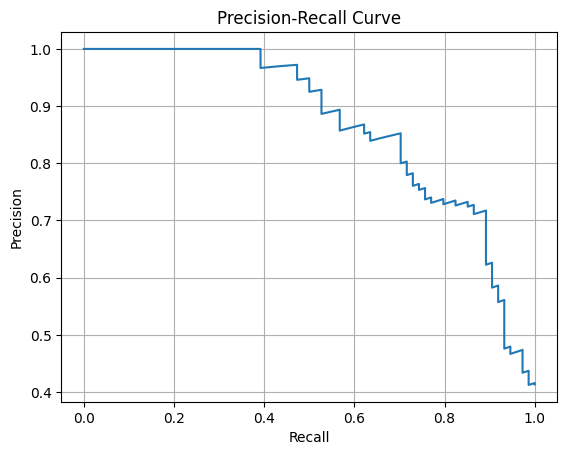

In [17]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()


13. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy

In [18]:
for solver in ['liblinear', 'saga', 'lbfgs']:
    model = LogisticRegression(solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    print(f"Solver: {solver}, Accuracy: {accuracy_score(y_test, model.predict(X_test))}")


Solver: liblinear, Accuracy: 0.7821229050279329
Solver: saga, Accuracy: 0.7039106145251397
Solver: lbfgs, Accuracy: 0.7988826815642458


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


14. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC)

In [19]:
from sklearn.metrics import matthews_corrcoef

print("MCC:", matthews_corrcoef(y_test, y_pred))


ValueError: Found input variables with inconsistent numbers of samples: [179, 45]

15. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling

In [20]:
model_raw = LogisticRegression(max_iter=1000).fit(X_train, y_train)
acc_raw = accuracy_score(y_test, model_raw.predict(X_test))

model_scaled = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, model_scaled.predict(X_test_scaled))

print("Raw accuracy:", acc_raw)
print("Scaled accuracy:", acc_scaled)


Raw accuracy: 0.7988826815642458
Scaled accuracy: 0.7988826815642458


16. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation

In [21]:
from sklearn.model_selection import cross_val_score

for c in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(C=c, max_iter=1000)
    scores = cross_val_score(model, X, y, cv=5)
    print(f"C={c}, Average CV Accuracy: {scores.mean():.4f}")


C=0.01, Average CV Accuracy: 0.7285
C=0.1, Average CV Accuracy: 0.7756
C=1, Average CV Accuracy: 0.7868
C=10, Average CV Accuracy: 0.7868
C=100, Average CV Accuracy: 0.7868


17. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions

In [22]:
import joblib

# Train and save
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
joblib.dump(model, 'logreg_model.pkl')

# Load and predict
loaded_model = joblib.load('logreg_model.pkl')
print("Loaded model accuracy:", accuracy_score(y_test, loaded_model.predict(X_test)))


Loaded model accuracy: 0.7988826815642458
